In [1]:
import os
import numpy as np
import matplotlib
import pandas as pd
import json
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scienceplots

In [141]:
path = "/Users/ericavandersar/surfdrive/Documents/Research/Results_SurveyPaper"
# Define all possible names and assign fixed colors
all_names = ["DoNothing", "Greedy", "PPO", "PPO*"]
fixed_palette = dict(zip(all_names, sns.color_palette("hls", len(all_names))))

file_name_summ_data = "summarized_data.csv"
file_name_boxplot_data = "boxplot_data.csv"


In [5]:
rl_path = os.path.join(path, "PPO")
df_rl = pd.read_csv(os.path.join(rl_path, file_name_summ_data))
df_rl = df_rl.sort_values(['opponent', 'action space','train_opponent'], ascending=[True, True, True])
df_rl

,agent_type,agent_id,opponent,train_opponent,action space,observation space,AT,line_reco,line_disc,reset_topo,...,steps survived,completed episodes,steps overloaded,execution time [ms],agent execution time [ms],maximum topology depth,unique actions,unique lines in danger,unqique subs changed,substations changed
0,CustomPPO,CustomPPO_old_env_8858963_b869f,False,False,assym,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,81.29,67.0,0.014,0.134,2.155,5,36,11,10,[ 8 4 3 5 10 12 2 1 9 6]
12,CustomPPO,CustomPPO_old_env_8858964_bbfa5,False,False,assym,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,83.73,65.0,0.036,0.131,2.028,4,37,13,10,[ 3 8 1 5 4 10 9 6 12 0]
14,CustomPPO,CustomPPO_old_env_8858965_c1b05,False,False,assym,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,83.78,74.0,0.011,0.130,2.213,5,28,11,9,[ 8 3 4 5 1 11 9 10 12]
24,CustomPPO,CustomPPO_old_env_8858961_bdec6,False,False,assym,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,83.07,68.0,0.019,0.128,2.082,5,44,12,11,[ 8 3 1 4 5 0 11 6 10 2 12]
28,CustomPPO,CustomPPO_old_env_8858966_c1b05,False,False,assym,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,86.59,76.0,0.009,0.145,2.000,4,29,12,8,[ 4 8 3 1 5 12 11 2]
1,CustomPPO,CustomPPO_old_env_8945969_b7953,False,False,d3qn2022,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,57.72,28.0,0.099,2.809,3.982,1,5,8,2,[3 4]
3,CustomPPO,CustomPPO_old_env_8945971_bad2e,False,False,d3qn2022,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,58.97,30.0,0.087,2.952,4.256,2,8,4,3,[3 1 4]
10,CustomPPO,CustomPPO_old_env_8945972_b8736,False,False,d3qn2022,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,49.62,21.0,0.112,2.473,3.817,1,6,4,3,[3 4 1]
11,CustomPPO,CustomPPO_old_env_8945970_bad2f,False,False,d3qn2022,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,58.74,28.0,0.089,2.820,4.077,1,7,4,3,[3 4 1]
19,CustomPPO,CustomPPO_old_env_8945967_b9020,False,False,d3qn2022,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,57.88,30.0,0.098,2.879,4.252,2,7,4,3,[3 4 1]


In [17]:
filter_rl_base = ((df_rl['action space'] == "medha") & (df_rl['line_reco']) & ~(df_rl['line_disc']) & (df_rl['reset_topo']==0.0) )

base_rl = df_rl.loc[filter_rl_base]
base_rl

,agent_type,agent_id,opponent,train_opponent,action space,observation space,AT,line_reco,line_disc,reset_topo,...,steps survived,completed episodes,steps overloaded,execution time [ms],agent execution time [ms],maximum topology depth,unique actions,unique lines in danger,unqique subs changed,substations changed
2,CustomPPO,CustomPPO_old_env_8773703_13880,False,False,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,88.13,81.0,0.012,0.132,2.945,5,28,11,6,[ 8 3 4 5 1 12]
9,CustomPPO,CustomPPO_old_env_8773704_13fc9,False,False,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,90.56,84.0,0.005,0.129,2.175,4,27,10,5,[1 4 8 3 5]
21,CustomPPO,CustomPPO_old_env_8773705_13c89,False,False,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,87.37,78.0,0.014,0.129,2.044,4,37,14,6,[ 8 3 4 5 12 1]
27,CustomPPO,CustomPPO_old_env_8773702_1357a,False,False,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,83.77,72.0,0.010,0.128,2.038,4,34,13,6,[8 4 3 5 1 2]
29,CustomPPO,CustomPPO_old_env_8773678_08f9b,False,False,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,91.80,85.0,0.006,0.126,2.009,4,16,11,6,[ 8 3 1 5 4 12]
4,CustomPPO,CustomPPO_old_env_8893083_ca8dc,False,True,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,54.07,28.0,0.053,0.133,2.070,5,89,18,7,[ 1 4 2 8 3 5 12]
13,CustomPPO,CustomPPO_old_env_8893082_c8ceb,False,True,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,67.02,45.0,0.036,0.135,2.222,5,80,17,7,[ 1 4 8 2 3 5 12]
16,CustomPPO,CustomPPO_old_env_8893080_c6800,False,True,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,39.24,14.0,0.086,0.157,2.054,4,82,15,7,[ 8 5 3 2 1 4 12]
22,CustomPPO,CustomPPO_old_env_8893081_c811f,False,True,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,50.78,24.0,0.063,0.153,1.889,5,93,17,7,[ 4 5 8 12 3 1 2]
23,CustomPPO,CustomPPO_old_env_8893076_cb8cb,False,True,medha,"['p_i', 'p_l', 'r', 'o', 'd']",0.95,True,False,0.0,...,82.41,65.0,0.015,0.131,1.847,5,49,17,7,[ 1 4 8 5 3 12 2]


In [25]:
df_box_rl = pd.read_csv(os.path.join(rl_path, file_name_boxplot_data))
df_box_rl

,agent_type,agent_id,opponent,action space,rules,survived
0,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
1,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",810
2,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
3,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",1093
4,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
...,...,...,...,...,...,...
5495,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",3
5496,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",290
5497,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",144
5498,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",576


In [92]:
# Merge train_opponent column based on agent_id
df_box_rl = df_box_rl.merge(df_rl[['agent_id', 'opponent', 'train_opponent']], on=['agent_id','opponent'], how='left')
df_box_rl

,agent_type,agent_id,opponent,action space,rules,survived,train_opponent_x,train_opponent_y,train_opponent_x,train_opponent_y,train_opponent
0,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False,False,False,False,False
1,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",810,False,False,False,False,False
2,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False,False,False,False,False
3,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",1093,False,False,False,False,False
4,CustomPPO,CustomPPO_old_env_8858963_b869f,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5495,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",3,False,False,False,False,False
5496,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",290,False,False,False,False,False
5497,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",144,False,False,False,False,False
5498,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",576,False,False,False,False,False


In [96]:
heur_path = os.path.join(path, "Greedy_DN")
df_box_heur = pd.read_csv(os.path.join(heur_path, file_name_boxplot_data))
df_box_heur = df_box_heur.sort_values(['opponent', 'action space'], ascending=[True, True])
df_box_heur

,agent_type,agent_id,opponent,action space,rules,survived
900,RhoGreedy,xxx,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
901,RhoGreedy,xxx,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
902,RhoGreedy,xxx,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
903,RhoGreedy,xxx,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
904,RhoGreedy,xxx,False,assym,"threshold=0.95, reco=True, disc=False, reset=0.0",8064
...,...,...,...,...,...,...
4395,RhoGreedy,xxx,True,tennet,"threshold=0.95, reco=True, disc=True, reset=0.8",866
4396,RhoGreedy,xxx,True,tennet,"threshold=0.95, reco=True, disc=True, reset=0.8",473
4397,RhoGreedy,xxx,True,tennet,"threshold=0.95, reco=True, disc=True, reset=0.8",864
4398,RhoGreedy,xxx,True,tennet,"threshold=0.95, reco=True, disc=True, reset=0.8",1442


# Baseline agents

In [102]:
filter_greedy_base = ((df_box_heur['agent_type'] == "RhoGreedy") & (df_box_heur['action space'] == "medha") & (df_box_heur['rules'].isin(["threshold=0.95, reco=True, disc=False, reset=0.0","threshold=0.95, reco=True, disc=False, reset=2.0"])))
filter_dn_base = ((df_box_heur['agent_type'] == "DoNothing") & (df_box_heur['rules'].isin(["threshold=0.95, reco=True, disc=False, reset=0.0","threshold=0.95, reco=True, disc=False, reset=2.0"])))
base_heur = df_box_heur.loc[(filter_greedy_base | filter_dn_base)].copy()
base_heur.loc[base_heur['agent_type']=='RhoGreedy', 'agent_type'] = 'Greedy'
base_heur

,agent_type,agent_id,opponent,action space,rules,survived
200,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",519
201,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",797
202,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",3268
203,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",1086
204,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",521
...,...,...,...,...,...,...
4095,Greedy,xxx,True,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",720
4096,Greedy,xxx,True,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",768
4097,Greedy,xxx,True,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",864
4098,Greedy,xxx,True,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",872


In [60]:
filter_box_base = ((df_box_rl['agent_id'].isin(base_rl['agent_id'].values)))
base_box_rl = df_box_rl.loc[filter_box_base].copy()
base_box_rl

,agent_type,agent_id,opponent,action space,rules,survived,train_opponent
200,CustomPPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
201,CustomPPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",813,False
202,CustomPPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
203,CustomPPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
204,CustomPPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
...,...,...,...,...,...,...,...
5495,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",3,False
5496,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",290,False
5497,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",144,False
5498,CustomPPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",576,False


In [62]:
base_box_rl.loc[:, 'agent_type'] = base_box_rl['train_opponent'].apply(lambda x: "PPO*" if x else "PPO")
base_box_rl

,agent_type,agent_id,opponent,action space,rules,survived,train_opponent
200,PPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
201,PPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",813,False
202,PPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
203,PPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
204,PPO,CustomPPO_old_env_8773703_13880,False,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",8064,False
...,...,...,...,...,...,...,...
5495,PPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",3,False
5496,PPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",290,False
5497,PPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",144,False
5498,PPO,CustomPPO_old_env_8773678_08f9b,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",576,False


In [149]:
def make_boxplot(boxplot_df, action_space=None, palette=None):
    print("Making boxplot of survived time steps per agent...")
    # Filter only specific action space
    if action_space is not None:
        boxplot_df = boxplot_df[boxplot_df['action space'] == action_space]

    # Set up a color palette
    if palette is None:
        palette = sns.color_palette("hls", len(boxplot_df['agent_type'].unique()))
    style = ['science', 'grid', 'no-latex']
    plt.style.use(style) # use scientific plotting style.
    # # Create a new column combining agent_type and opponent for separate subplots
    boxplot_df['agent_opponent'] = boxplot_df.apply(
        lambda row: f"{row['agent_type']} " + ("-  with opponent" if row['opponent'] else f""), axis=1
    )
    # display(boxplot_df)

    # Create the boxplots
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Boxplot for survived by agent_type
    boxplot = sns.boxplot(
        data=boxplot_df,
        x='agent_opponent',
        y='survived',
        hue='agent_type',
        dodge=False,
        palette=palette,
        ax=ax
    )

    # Apply hatching based on opponent status
    patches = [patch for patch in boxplot.patches if type(patch) == mpatches.PathPatch]
    for patch, (_, row) in zip(patches, boxplot_df[['agent_opponent', 'opponent']].drop_duplicates().iterrows()):
        if row['opponent']:  # Apply hatching if opponent=True
            patch.set_hatch('//')

    # Customize legend
    handles, labels = ax.get_legend_handles_labels()
    hatch_patch = mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Opponent=True")
    plain_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="Opponent=False")
    ax.legend(
        handles=handles + [hatch_patch, plain_patch],
        labels=labels + ["Without Opponent", "With Opponent"],
        # title="Agent type and Opponent",
        bbox_to_anchor=(1, 1),
        loc='upper left',
        fontsize=14
    )

    # Customize the plot
    plt.title("Steps survived per agent", fontsize=20, fontweight="bold")
    plt.xlabel("Agent type", fontsize=16)
    plt.ylabel("Time steps survived", fontsize=16)
    x_labels = [f"{row['agent_type']}" for (_, row) in
                boxplot_df[['agent_opponent', 'agent_type']].drop_duplicates().iterrows()]
    boxplot.set_xticklabels(x_labels)
    plt.xticks(fontsize=16, rotation=45)
    plt.yticks(fontsize=16)
    boxplot.set_xticks([], minor=True) # remove extra ticks on x-axis.
    


    # Save the plot
    return plt
    # plt.savefig(os.path.join(path, f'box_plots_agents_rules_opponent.svg'))

Making boxplot of survived time steps per agent...


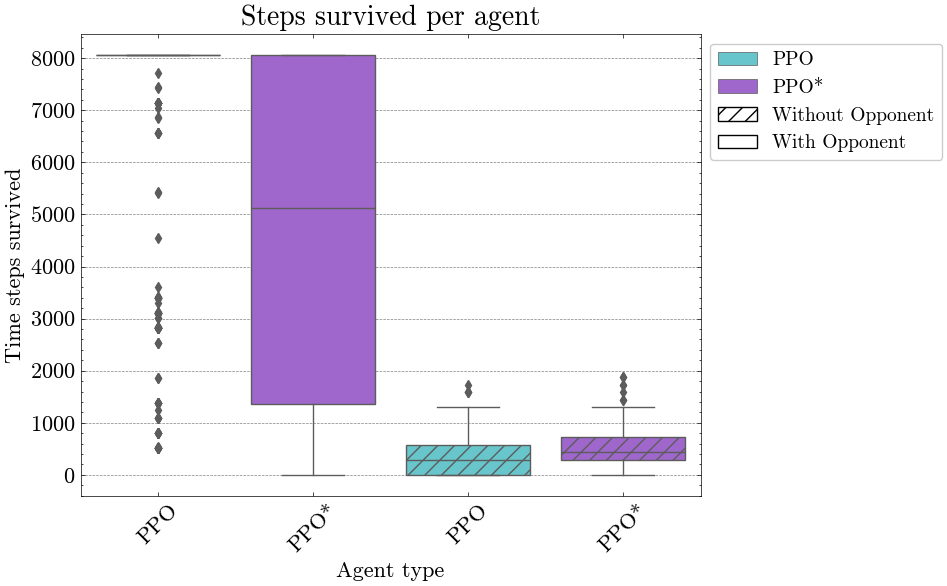

In [150]:
plt = make_boxplot(base_box_rl, palette=fixed_palette)

In [108]:
df_all_base = pd.concat([base_heur, base_box_rl])
df_all_base = df_all_base.sort_values(['opponent', 'agent_type'])
df_all_base

,agent_type,agent_id,opponent,action space,rules,survived,train_opponent,agent_opponent_actspace,group,agent_opponent
200,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",519,NaN,NaN,NaN,NaN
201,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",797,NaN,NaN,NaN,NaN
202,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",3268,NaN,NaN,NaN,NaN
203,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",1086,NaN,NaN,NaN,NaN
204,DoNothing,xxx,False,medha,"threshold=0.95, reco=True, disc=False, reset=2.0",521,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4895,PPO*,CustomPPO_old_env_8893076_cb8cb,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",576,True,PPO* - with opponent,PPO* | Opponent=True,PPO* - with opponent
4896,PPO*,CustomPPO_old_env_8893076_cb8cb,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",289,True,PPO* - with opponent,PPO* | Opponent=True,PPO* - with opponent
4897,PPO*,CustomPPO_old_env_8893076_cb8cb,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",153,True,PPO* - with opponent,PPO* | Opponent=True,PPO* - with opponent
4898,PPO*,CustomPPO_old_env_8893076_cb8cb,True,medha,"threshold=0.95, reco=True, disc=False, reset=0.0",148,True,PPO* - with opponent,PPO* | Opponent=True,PPO* - with opponent


Making boxplot of survived time steps per agent...


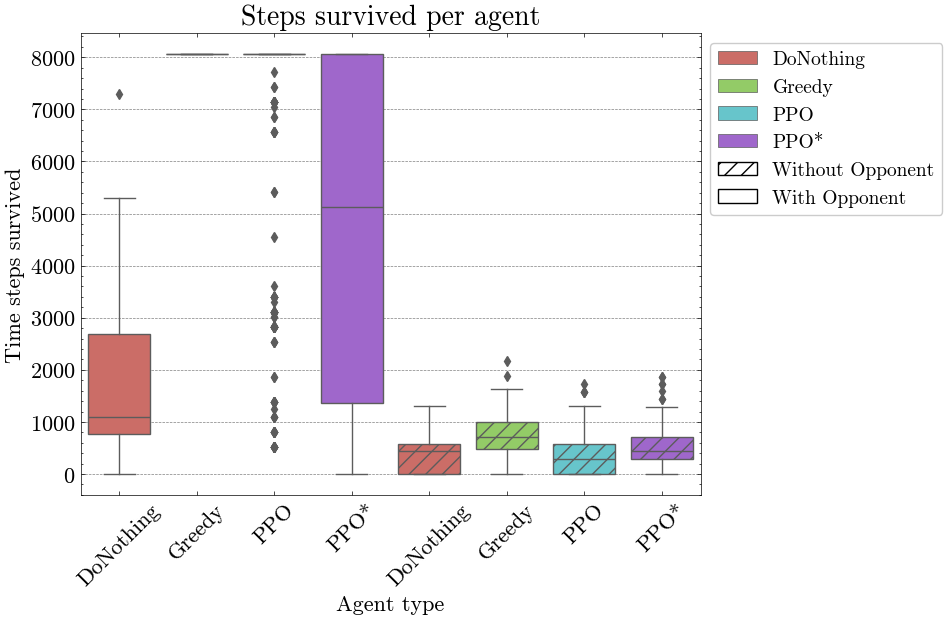

In [151]:
plt = make_boxplot(df_all_base, palette=fixed_palette)
# Save the plot
plt.savefig(os.path.join(path, f'BoxPlot_BaselineAgents.svg'))

In [140]:
palette = sns.color_palette("hls")
palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

In [148]:
fixed_palette

{'DoNothing': (0.86, 0.3712, 0.33999999999999997),
 'Greedy': (0.5688000000000001, 0.86, 0.33999999999999997),
 'PPO': (0.33999999999999997, 0.8287999999999999, 0.86),
 'PPO*': (0.6311999999999998, 0.33999999999999997, 0.86)}